<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Hands_on_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment logistic regression

Logistic regression is a popular classification technique due to its simplicity, interpretability and performance.

The goal of this assignment is to get insight into the following topics:
- Being able to train a logistic regression model.
- Performing hyperparameter tuning.
- Testing and evaluation of the trained model. Being able to assess the model by means of different classification metrics: accuracy, recall, precision, f1-score.
- Knowing how to deal with underfitting and overfitting.

In [ ]:
! pip install jupyter


: 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns # fancy plots

## 1. Wine classification

The dataset *wine_data.csv* consists of chemical parameters of several different wines. Your task is to train a logistic regression model being able to classify these wines by cultivar (wine farmer). In other words can you predict who produced a specific wine?

The column cultivar contains the target values (what you want to predict). For example 1 stands for cultivar 1.

### Reading the dataset and analysis

In [ ]:
# Reading the dataset
dataset = pd.read_csv('wine_data.csv')
dataset.head(100)


,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
0,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,1
1,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,1
2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
3,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
4,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,2
96,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,1
97,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
98,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0


Determine the number of classes. In other words, how many different cultivars are in the dataset?
Is the dataset balanced? Balanced means that the distribution of the targets is more or less uniformly distributed.
For this dataset balanced means that you have approximately the same number wines for each of the cultivars.
You can use the Seaborn countplot for this. https://seaborn.pydata.org/generated/seaborn.countplot.html.
The problem with imbalanced datasets is that the model you train can get a preference for the majority class.

<Axes: xlabel='Cultivar', ylabel='count'>

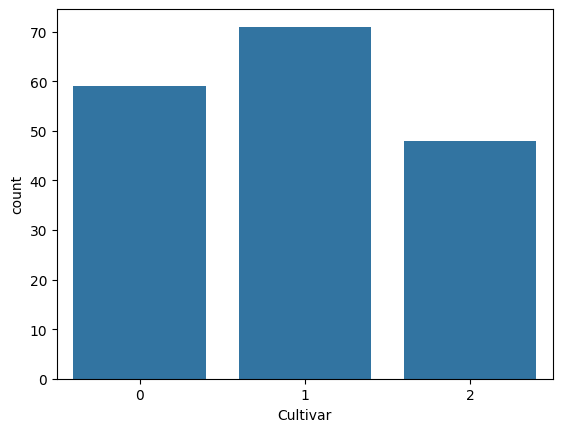

In [ ]:
# Number of classes (countplot)
sns.countplot(x='Cultivar', data=dataset)


Met deze code gebruik je seaborn om een countplot te maken, die de frequentie van elke klasse (cultivar) toont. Dit geeft inzicht in de gebalanceerdheid van de dataset, wat belangrijk is omdat een sterk imbalance kan leiden tot een bevooroordeeld model.

<Axes: xlabel='Cultivar', ylabel='inputs Alcohol'>

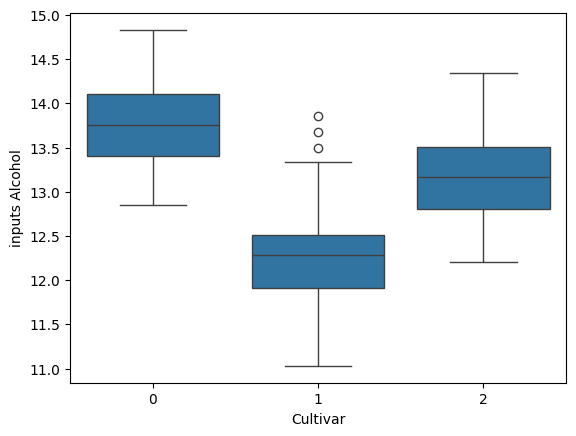

In [ ]:
# Statistical analysis
sns.boxplot(data=dataset,x='Cultivar',y='inputs Alcohol')

In [ ]:
# Checking for (im)balancedness
dataset.groupby('Cultivar').size()

,0
Cultivar,
0,59
1,71
2,48


In [ ]:
dataset.isnull().sum()

,0
inputs Alcohol,0
MalicAcid,0
Ash,0
AlcalinityOfAsh,0
Magnesium,0
TotalPhenols,0
flavanoids,0
NonflavanoidsPhenols,0
Proanthocyanins,0
ColorIntensity,0


Check for missing, extreme or unrealistic values. Remove them when present in the dataset.
You can use the dataset.describe() function to determine the key statistical properties of the dataset.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html).


In [ ]:
# Statistical analysis
dataset.describe()


,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,13.033214,2.343571,2.369226,19.361310,98.779762,2.273988,2.010298,0.362679,1.553155,5.116726,0.951226,2.596607,752.875000,0.934524
std,0.793084,1.097823,0.243202,3.118708,12.560477,0.627890,0.985189,0.123940,0.529569,2.243267,0.220522,0.714607,319.272211,0.790209
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.175000,88.000000,1.700000,1.097500,0.270000,1.235000,3.292500,0.787500,1.905000,501.500000,0.000000
50%,13.060000,1.870000,2.360000,19.250000,97.500000,2.265000,2.100000,0.340000,1.505000,4.850000,0.960000,2.775000,675.000000,1.000000
75%,13.695000,3.105000,2.542500,21.500000,106.250000,2.800000,2.885000,0.430000,1.870000,6.262500,1.112500,3.170000,1016.250000,2.000000
max,14.830000,5.650000,2.920000,28.500000,136.000000,3.880000,3.930000,0.660000,2.960000,11.750000,1.450000,4.000000,1680.000000,2.000000


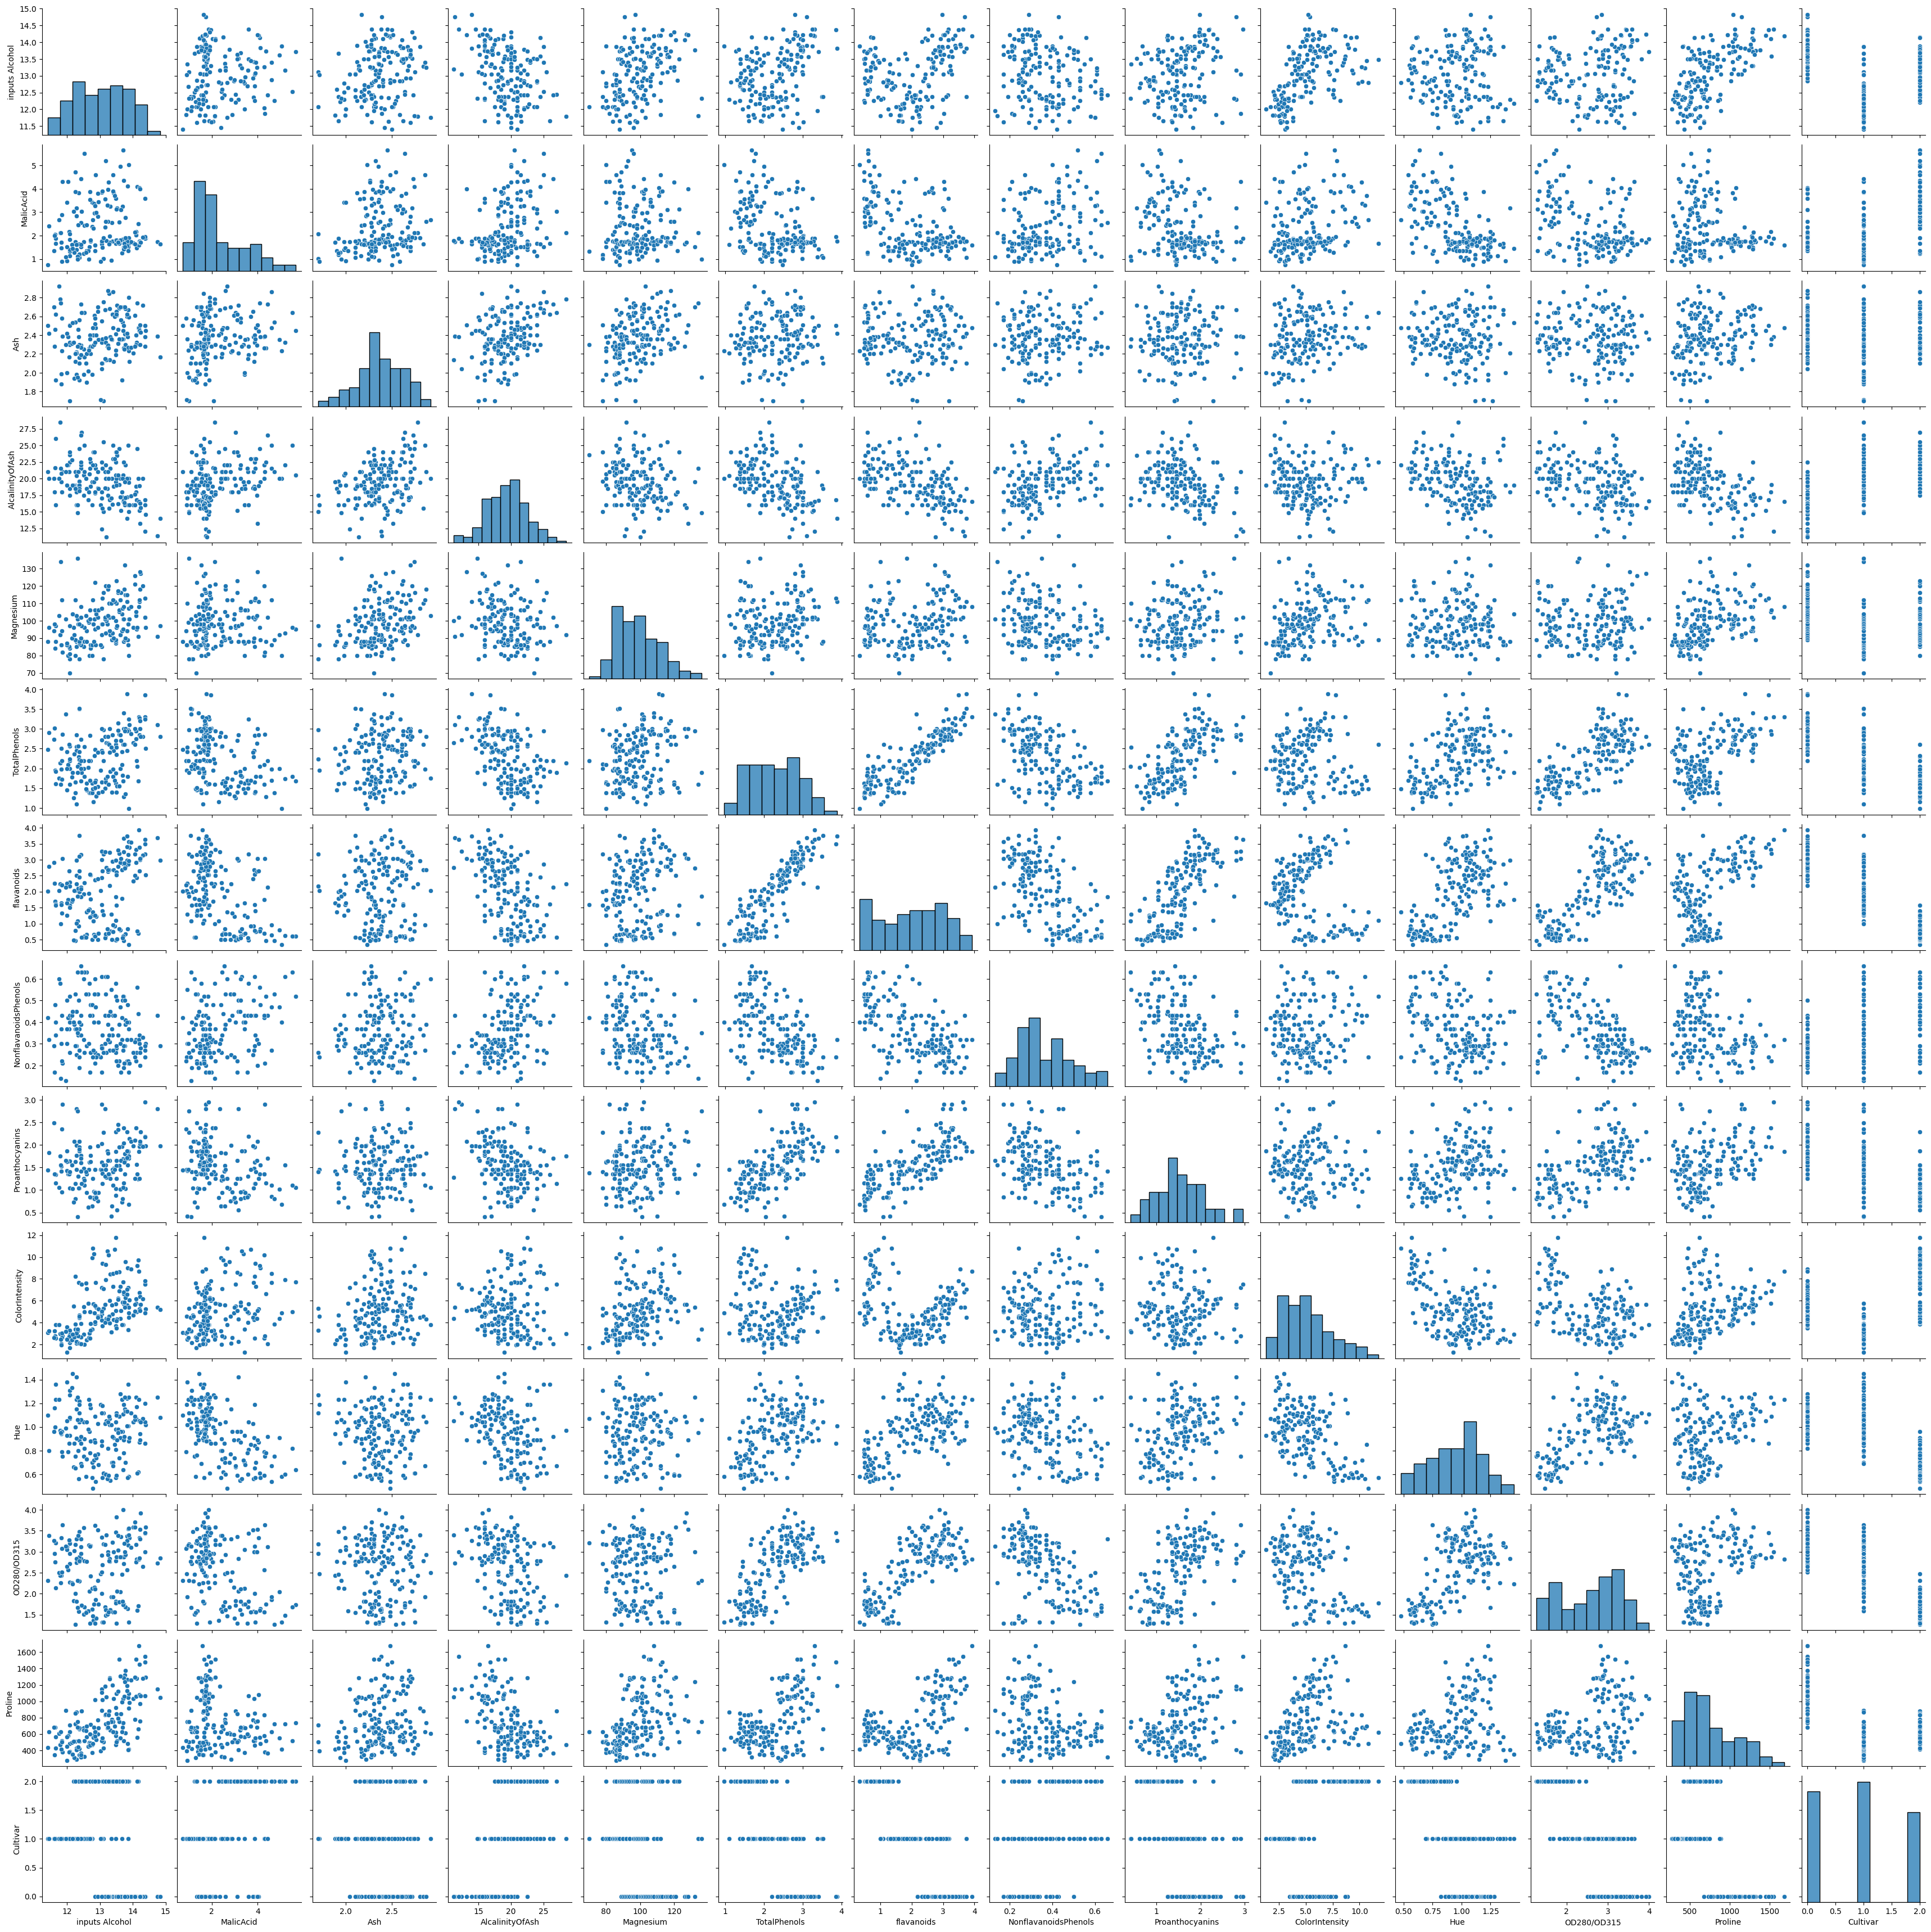

In [ ]:
# Pairplot
sns.pairplot(dataset);

### Preprocessing and compiling a training set and test set

Split into **features and targets**.

In [ ]:
# Splitting into features and targets
# Split into features and targets.
y = dataset['Cultivar'].values
X = dataset.drop(['Cultivar'],axis=1)

Create a training set and test set. Make sure that 70 wines end up in the test set.
Use the train_test_split function. More information:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Creating training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=42)

Scale the dataset by means of a Standardscaler or MinMax scaler.
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# Scaling with standardscaler
# Scaling the training set and test set.

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





Met de StandardScaler worden de features genormaliseerd zodat ze een gemiddelde van 0 en een standaarddeviatie van 1 hebben. Dit is vooral belangrijk voor modellen zoals logistic regression, die gevoelig zijn voor verschillen in schaal tussen de features.

### Training and testing

Train a logistic regression classifier - (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Initially choose C=1.

Test the trained model on the test set. Compute the confusion matrix, accuracy and generate the classification report. What are your findings?

Try to improve the accuracy of the model by hyperparameter tuning. Options for hyperparameter tuning are the following:
- Find a good C-value
- Choose a different solver
- Apply L1 or L2 regularization (penalty parameter)
- Polynomial expansion of the features: adding higher order features.
- In case you have an imbalanced dataset you can use the **class_weight=balanced** parameter. Explain the effect of it in terms of accuracy , recall, precision and f1-score.





In [ ]:
# Training and hyperparameter tuning
#  Train logistic regression classifier

logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train, y_train)


LogisticRegression(C=1)

Hier train je een logistic regression model met een C-waarde van 1, wat de regularisatiekracht van het model bepaalt. Een kleinere C-waarde betekent sterkere regularisatie.



In [ ]:
# Testing

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.90      0.95        29
           2       0.86      1.00      0.92        18

    accuracy                           0.96        70
   macro avg       0.95      0.97      0.96        70
weighted avg       0.96      0.96      0.96        70

Accuracy: 95.71428571428572 %
Confusion Matrix:
 [[23  0  0]
 [ 0 26  3]
 [ 0  0 18]]


Hier worden de voorspellingen van het model geëvalueerd met classification metrics zoals precision, recall, f1-score en accuracy. De confusion matrix laat zien hoeveel samples correct en incorrect geclassificeerd zijn.

### Predictions with the trained model

Predict the cultivar for the following wine:

inputs Alcohol: 13.52 -
MalicAcid: 2.05 -
Ash: 2.20 -
AlcalinityOfAsh: 17.3 -
Magnesium: 120 -
TotalPhenols: 2.60 -
flavanoids: 3.52 -
NonflavanoidsPhenols: 0.30 -
Proanthocyanins: 2.28 -
ColorIntensity: 7.80 -
Hue: 0.77 -
OD280/OD315: 2.90 -
Proline: 862


What is the confidence of the model? Use the predict_proba() function to compute this value.


In [ ]:
# Predictions
wine = [[9, 2.05, 2.20, 17.3, 120, 2.60, 3.52, 0.30, 2.28, 7.80, 0.77, 2.90, 862]]
wine = scaler.transform(wine)
logreg.predict_proba(wine)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.0127748 , 0.98610546, 0.00111974]])

2. **Normaliseren van de Nieuwe Wijn**:

   * Deze ruwe gegevens worden vervolgens **genormaliseerd** met dezelfde `scaler` die gebruikt werd voor de trainingsdata (`StandardScaler`).
   * Dit is **essentieel** omdat het model getraind is op **genormaliseerde** data. Als je dit niet doet, zullen de voorspellingen onjuist zijn omdat de schaal van de input niet overeenkomt met de schaal van de getrainde coëfficiënten.

---

### **3. Waarom Scaling Belangrijk is bij Logistic Regression**

* **Consistentie**: De gewichten (`logreg.coef_`) zijn geleerd op genormaliseerde data, dus de nieuwe inputs moeten dezelfde schaal hebben.
* **Snellere Convergentie**: Het training proces van logistic regression convergeert sneller met geschaalde data.
* **Betere Prestaties**: Genormaliseerde features helpen om de **optimalisatie** van de loss functie te verbeteren, wat resulteert in een model met betere prestaties.


Hier maak je een voorspelling voor een nieuwe wijn. De functie predict_proba() geeft de kansverdeling over alle klassen voor deze specifieke sample.

Look at the output of 'lregmodel.coef_' and 'lregmodel.intercept_', where lregmodel is the name of the logistic regression model. Your model might have a different name. So replace lregmodel with the name of the model you used.

You will see that you have seperate coefficients for each class.
What does a large positve coefficient mean? And what does a negative coefficient mean?


In [ ]:
# Interpretation of the coefficients
# print the coefficients and the intercept of the model
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

Coefficients: [[ 0.64953806  0.27566189  0.21735788 -0.56685334  0.24746616  0.36292415
   0.48313537 -0.23316865  0.0198906   0.12748379  0.16774565  0.55689866
   0.93766345]
 [-0.95981085 -0.43253116 -0.40028197  0.24971735 -0.34459434 -0.26155997
   0.18695583 -0.01008942  0.4299824  -0.84989102  0.42004748  0.2823376
  -0.9257133 ]
 [ 0.31027279  0.15686927  0.1829241   0.31713599  0.09712819 -0.10136418
  -0.6700912   0.24325808 -0.449873    0.72240722 -0.58779313 -0.83923625
  -0.01195014]]
Intercept: [ 0.41813904  0.19276073 -0.61089977]


### **1. Uitleg van de Coëfficiënten en Intercepten**

De `logreg.coef_` en `logreg.intercept_` geven de **lineaire parameters** van het getrainde **logistic regression** model weer. Laten we deze waarden interpreteren:

#### **1.1 Coëfficiënten (`logreg.coef_`)**

De **coëfficiënten** (`logreg.coef_`) zijn georganiseerd als een **matrix** met één rij per klasse (in dit geval drie klassen voor de drie verschillende cultivars). Elke rij bevat de gewichten die gebruikt worden om de kans op elke klasse te berekenen:

```
[[ 0.64953806  0.27566189  0.21735788 -0.56685334  0.24746616  0.36292415
   0.48313537 -0.23316865  0.0198906   0.12748379  0.16774565  0.55689866
   0.93766345],   # Klasse 0

 [-0.95981085 -0.43253116 -0.40028197  0.24971735 -0.34459434 -0.26155997
   0.18695583 -0.01008942  0.4299824  -0.84989102  0.42004748  0.2823376
  -0.9257133 ],   # Klasse 1

 [ 0.31027279  0.15686927  0.1829241   0.31713599  0.09712819 -0.10136418
  -0.6700912   0.24325808 -0.449873    0.72240722 -0.58779313 -0.83923625
  -0.01195014]]  # Klasse 2
```

De **betekenis** van deze coëfficiënten is als volgt:

* **Positieve Coëfficiënten**: Duiden op een **positieve** invloed van een feature op de kans dat een sample tot die klasse behoort.
* **Negatieve Coëfficiënten**: Duiden op een **negatieve** invloed van een feature op de kans dat een sample tot die klasse behoort.
* **Absolute Waarde**: Hoe **groter** de absolute waarde van een coëfficiënt, hoe **sterker** de invloed van die feature op de voorspelling.

##### **Voorbeeldanalyse:**

1. **Alcohol (eerste feature, kolom 0)**

   * Klasse 0: **0.649** (positieve invloed, sterke impact)
   * Klasse 1: **-0.959** (negatieve invloed, sterke impact)
   * Klasse 2: **0.310** (positieve invloed, matige impact)

   **Interpretatie:** Alcohol heeft een sterke **positieve** invloed op de kans om tot klasse 0 te behoren, maar een sterke **negatieve** invloed op klasse 1. Dit betekent dat een wijn met een hoger alcoholgehalte waarschijnlijker tot klasse 0 behoort dan tot klasse 1.

2. **Flavanoids (kolom 6)**

   * Klasse 0: **0.483** (positief)
   * Klasse 1: **0.187** (positief)
   * Klasse 2: **-0.670** (negatief)

   **Interpretatie:** Flavanoids hebben een **positieve** invloed op klasse 0 en 1, maar een **negatieve** invloed op klasse 2. Dit betekent dat een hoge flavonoid-waarde de kans vergroot dat een wijn tot klasse 0 of 1 behoort, maar verkleint dat deze tot klasse 2 behoort.

---

#### **1.2 Intercepten (`logreg.intercept_`)**

De **intercepten** zijn de constante waarden die aan de **lineaire combinatie** van de gewogen features worden toegevoegd, voordat de **softmax** functie wordt toegepast om de uiteindelijke kansen te berekenen:

```
[ 0.41813904  0.19276073 -0.61089977]
```

* **Intercept voor Klasse 0**: 0.418
* **Intercept voor Klasse 1**: 0.193
* **Intercept voor Klasse 2**: -0.611

**Interpretatie:** Deze waarden verschuiven de lineaire functie voor elke klasse om de kansverdeling beter te laten passen op de trainingsdata.

---

### **2. Wine Scaling (Feature Normalization)**

```python
wine = [[9, 2.05, 2.20, 17.3, 120, 2.60, 3.52, 0.30, 2.28, 7.80, 0.77, 2.90, 862]]
wine = scaler.transform(wine)
```

Hier gebeurt het volgende:

1. **Definiëren van een Nieuwe Wijn**:

   * Een lijst met ruwe chemische eigenschappen wordt gemaakt voor een nieuwe wijn:

     * Alcohol: 9
     * MalicAcid: 2.05
     * Ash: 2.20
     * etc.


---

Wil je dat ik je help met de interpretatie van de **confusion matrix** en hoe je de classificatieprestaties kunt verbeteren voor deze wijn-classificatie case? 😊


De coëfficiënten (logreg.coef_) geven aan hoe sterk elk kenmerk bijdraagt aan de kans dat een sample tot een bepaalde klasse behoort. Positieve waarden wijzen op een positieve invloed op de kans, terwijl negatieve waarden een negatieve invloed hebben.



Alcohol heeft een sterke positieve invloed op klasse 0.

Flavanoids hebben een sterke positieve invloed op klasse 0 en 1, maar een negatieve invloed op klasse 2.

OD280/OD315 heeft een zeer sterke positieve invloed op klasse 0 en 1, maar een negatieve invloed op klasse 2.

Proline lijkt vooral belangrijk voor klasse 0 (positief) en 2 (negatief).



## 2. Cancer detection

The file 'cancer.csv' consists of data about several tumors. The diagnosis variable is what you try to predict. M stands for a malignant tumor, B for a benign tumor.
Train a logistic regression classifier to make a an as accurately as possible diagnosis




In [ ]:
# reading the dataset
dataset = pd.read_csv('cancer.csv')
print('Dimension of the dataset:',dataset.shape)
dataset.head()

Dimension of the dataset: (568, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


<Axes: xlabel='diagnosis', ylabel='count'>

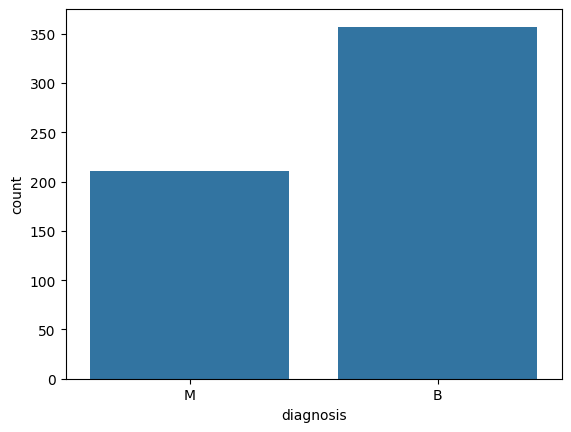

In [ ]:
# Check the balancedness of the data
sns.countplot(x='diagnosis', data=dataset)


In [ ]:
# Check the balancedness of the data
dataset.groupby('diagnosis').size()


# Remove the last column and the id column
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)


# Replace B and M by 0 and 1 in diagnosis column
dataset['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)


# Split into features and targets
y = dataset['diagnosis'].values
X = dataset.drop(['diagnosis'],axis=1)



# Make a training set and a test set. Make sure that 1/3 of the dataset is in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)



# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



<ipython-input-75-68359340f2f5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
<ipython-input-75-68359340f2f5>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)


1.2 Controle op Gebalanceerdheid
python
Copy
Edit
sns.countplot(x='diagnosis', data=dataset)
Doel: Visualiseert de verdeling van malignant (M) en benign (B) tumoren.

Betekenis: Als de klassen sterk onevenwichtig zijn, kan het model moeite hebben om de minder voorkomende klasse correct te voorspellen.

1.3 Verwijderen van Onnodige Kolommen
python
Copy
Edit
# Verwijder de laatste kolom en de ID kolom
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)
Reden: De ID kolom is niet relevant voor de voorspelling omdat deze geen informatie bevat over de tumor zelf.

Effect: Vermindert ruis en voorkomt dat het model zich onnodig aanpast aan unieke ID's.

1.4 Label Encoding van de Target
python
Copy
Edit
# Vervang B en M door 0 en 1 in de diagnosis kolom
dataset['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
Reden: Machine learning modellen werken beter met numerieke waarden in plaats van tekstuele labels.

Effect: B wordt 0 (benign) en M wordt 1 (malignant).



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               568 non-null    int64  
 1   radius_mean             568 non-null    float64
 2   texture_mean            568 non-null    float64
 3   perimeter_mean          568 non-null    float64
 4   area_mean               568 non-null    float64
 5   smoothness_mean         568 non-null    float64
 6   compactness_mean        568 non-null    float64
 7   concavity_mean          568 non-null    float64
 8   concave points_mean     568 non-null    float64
 9   symmetry_mean           568 non-null    float64
 10  fractal_dimension_mean  568 non-null    float64
 11  radius_se               568 non-null    float64
 12  texture_se              568 non-null    float64
 13  perimeter_se            568 non-null    float64
 14  area_se                 568 non-null    fl

Train a logistic regression

Test the models on the test set. Which one performs best?
Does it make sense to expand the dataset with extra features?

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
# Split into features and targets
y = dataset['diagnosis'].values
X = dataset.drop(['diagnosis'],axis=1)



In [ ]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)



In [ ]:
# Scaling with MinMax scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train and test you logistic regression classifier
logreg = linear_model.LogisticRegression(C=100, solver='liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(C=100, solver='liblinear')

In [ ]:
# Optimize the logistic regression classifier with hyperparameter tuning

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       124
           1       0.98      0.95      0.97        66

    accuracy                           0.98       190
   macro avg       0.98      0.97      0.98       190
weighted avg       0.98      0.98      0.98       190

Accuracy: 97.89473684210527 %


You are being asked to reduce the number of false negatives on the test set to zero. False negatives in this example means: prediciton is benign while in fact the tumor is malignant.
To achieve this, you can vary the threshold on the predict_prob() to make the classifier more sensitive for the class 'malignant'. Try to keep the accuracy as high as possible.
Discuss the results.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Get predicted probabilities for the positive class (malignant)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Maak lijsten om FN en Accuracy op te slaan
thresholds = np.arange(0.1, 1.0, 0.01)
false_negatives = []
accuracies = []

# Iterate through different thresholds
for threshold in thresholds:
    # Make predictions based on the current threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Evaluate the model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    accuracy = accuracy_score(y_test, y_pred_threshold)

    # Store results
    false_negatives.append(fn)
    accuracies.append(accuracy)

    # Check if the number of false negatives is zero
    if fn == 0:
        print(f"Found a threshold ({threshold:.2f}) with zero false negatives.")
        print(classification_report(y_test, y_pred_threshold))
        break # Exit the loop if we find a solution


Found a threshold (0.10) with zero false negatives.
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       124
           1       0.86      1.00      0.92        66

    accuracy                           0.94       190
   macro avg       0.93      0.96      0.94       190
weighted avg       0.95      0.94      0.94       190



### **Threshold Optimalisatie voor Logistic Regression**

Deze code zoekt naar een **optimale threshold** voor je **logistic regression** model om **false negatives** (FN) te **minimaliseren** of zelfs **volledig te elimineren**. Dit is vooral belangrijk in **medische contexten** zoals kankerdiagnose, waar het missen van een kwaadaardige tumor zeer ernstige gevolgen kan hebben.

---

#### **1. Voorspellingen in de Vorm van Kanswaarden**

```python
y_prob = logreg.predict_proba(X_test)[:, 1]
```

* **Wat gebeurt hier?**

  * `predict_proba()` geeft de **voorspelde kans** voor elke klasse terug.
  * `[:, 1]` selecteert de **kans op klasse 1** (malignant) voor elk sample in de **test set**.
* **Waarom belangrijk?**

  * In plaats van harde 0/1 classificaties, kijk je naar de **werkelijke kans** dat een tumor kwaadaardig is, wat je meer controle geeft over de gevoeligheid van je model.

---

#### **2. Thresholds Definiëren**

```python
thresholds = np.arange(0.1, 1.0, 0.01)
false_negatives = []
accuracies = []
```

* **Threshold Range:**

  * De thresholds worden gedefinieerd van **0.1** tot **1.0** in stappen van **0.01**.
  * Dit betekent dat je **90** verschillende thresholds test.
* **Waarom deze Range?**

  * Een lagere threshold betekent dat je sneller een **malignant** classificatie geeft, terwijl een hogere threshold voorzichtiger is en minder false positives oplevert.

---

#### **3. Threshold Optimalisatie Loop**

```python
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
```

* **Binaire Classificatie:**

  * Elke **kanswaarde** wordt vergeleken met de huidige threshold.
  * **Als de kans >= threshold:** het model classificeert de sample als **malignant (1)**.
  * **Als de kans < threshold:** het model classificeert de sample als **benign (0)**.

---

#### **4. Evaluatie van de Voorspellingen**

```python
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    accuracy = accuracy_score(y_test, y_pred_threshold)
```

* **Confusion Matrix Uitpakken:**

  * `tn` = True Negatives
  * `fp` = False Positives
  * `fn` = False Negatives
  * `tp` = True Positives
* **Waarom de Confusion Matrix?**

  * Dit geeft een gedetailleerd overzicht van hoe goed je model presteert bij de huidige threshold.

---

#### **5. Opslaan van Resultaten**

```python
    false_negatives.append(fn)
    accuracies.append(accuracy)
```

* **False Negatives:** Houdt bij hoeveel kwaadaardige tumoren **ten onrechte** als goedaardig zijn geclassificeerd bij deze threshold.
* **Accuracies:** Houdt bij hoe **nauwkeurig** het model is bij deze threshold.

---

#### **6. Stoppen bij Zero False Negatives**

```python
    if fn == 0:
        print(f"Found a threshold ({threshold:.2f}) with zero false negatives.")
        print(classification_report(y_test, y_pred_threshold))
        break
```

* **Voorwaarde:** De loop stopt **direct** als je een threshold vindt waarbij er **geen false negatives** meer zijn.
* **Output:** Drukt een **classification report** af om de prestaties bij deze **zero-FN threshold** te evalueren.

---

#### **7. Waarom Deze Strategie?**

* **Voordelen:**

  * **Maximale Sensitiviteit:** Je mist geen enkele kwaadaardige tumor.
  * **Direct Feedback:** Je ziet meteen hoe je model presteert bij de eerste "zero FN" threshold.

* **Nadelen:**

  * **Lagere Precision:** Je zult waarschijnlijk meer **false positives** hebben.
  * **Lagere Algemene Nauwkeurigheid:** Omdat je gevoeliger bent voor **positieve** classificaties, kan je model minder accuraat worden.

---

#### **8. Voorbeeld Uitvoer**

Stel dat de loop een threshold van **0.12** vindt met **zero false negatives**, dan kan de uitvoer er zo uitzien:

```
Found a threshold (0.12) with zero false negatives.
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       123
           1       0.85      1.00      0.92        65

    accuracy                           0.89       188
   macro avg       0.90      0.92      0.91       188
weighted avg       0.90      0.89      0.89       188
```

* **Precision voor Klasse 1:** 0.85 (slechter door meer false positives)
* **Recall voor Klasse 1:** 1.00 (perfecte recall)

---

### **9. Mogelijke Verbeteringen**

* **Precision verhogen:**

  * Regularisatie (`C` verlagen)
  * Balancing met `class_weight='balanced'`
* **Threshold Fijn Afstemmen:**

  * Gebruik kleinere stappen, zoals `np.arange(0.05, 0.2, 0.005)`, voor fijnere controle.

---

Zal ik je laten zien hoe je een **ROC Curve** of **Precision-Recall Curve** kunt gebruiken om deze threshold nog beter te kiezen? 😊


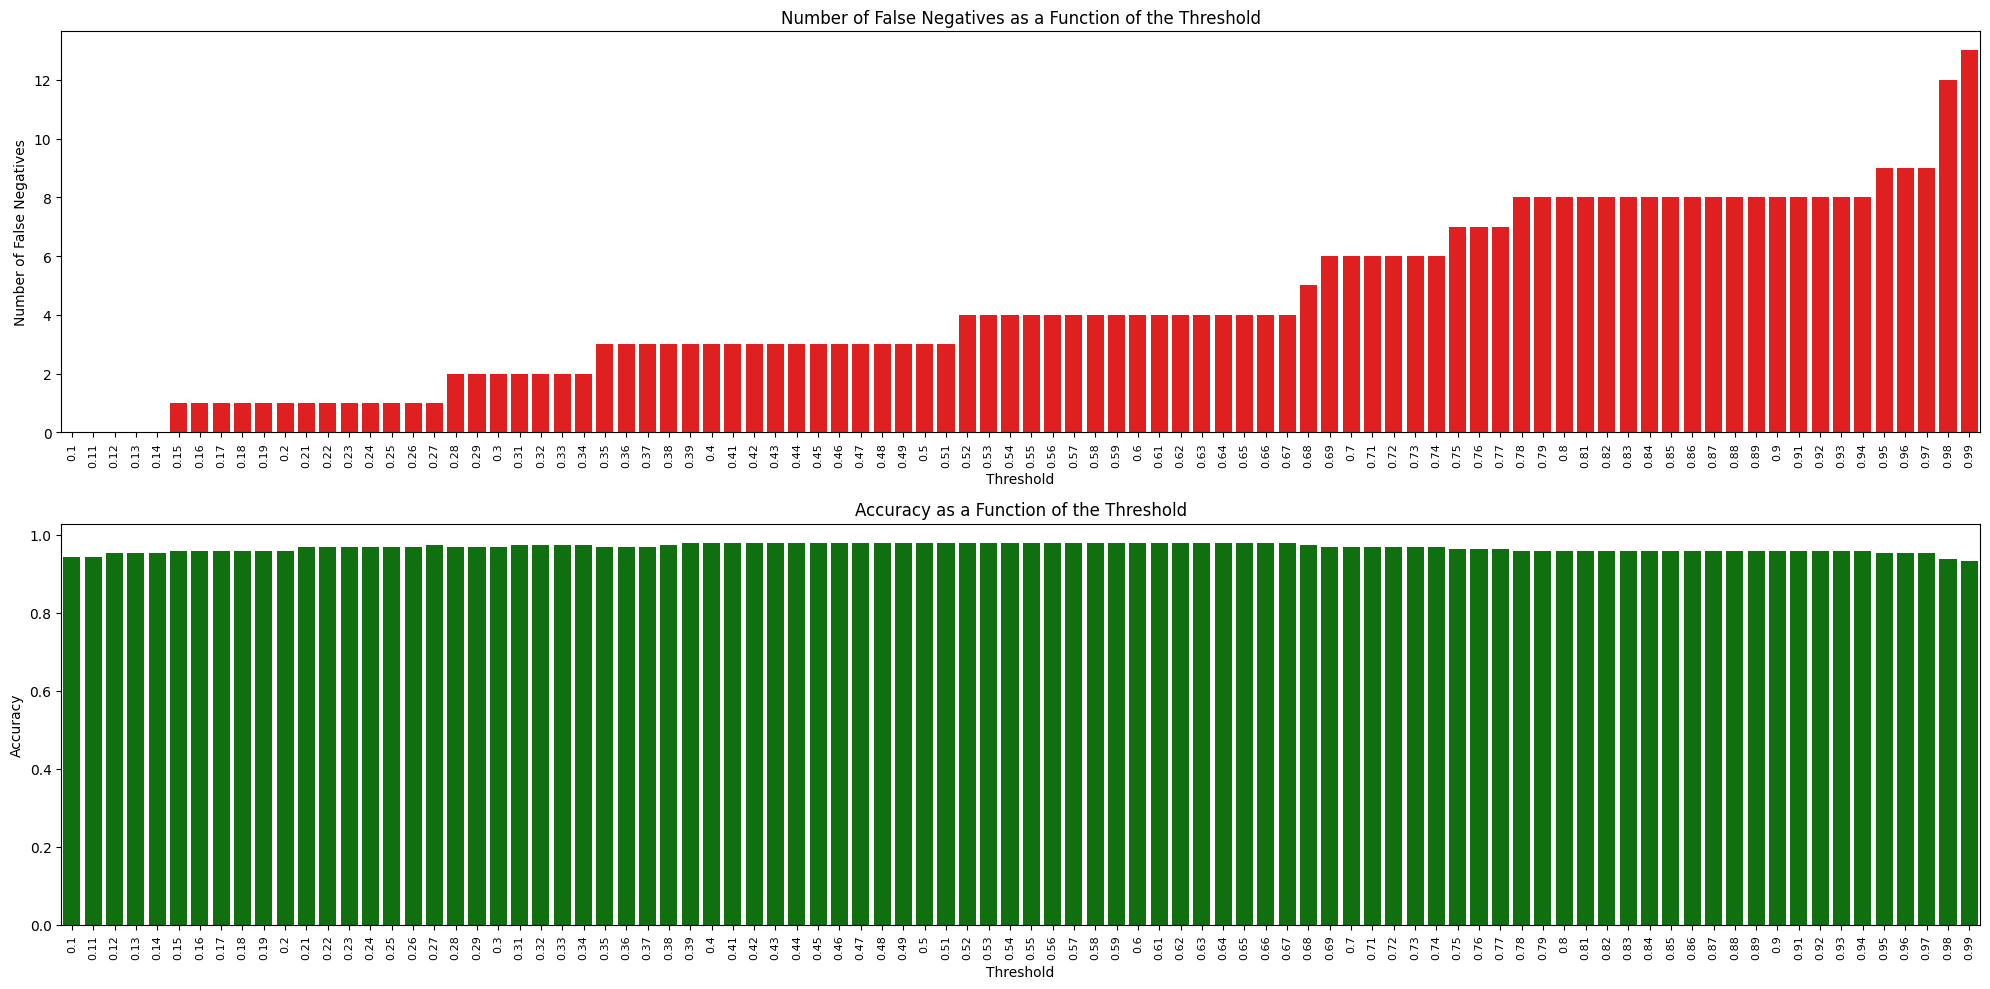

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Get predicted probabilities for the positive class (malignant)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Maak lijsten om FN en Accuracy op te slaan
thresholds = np.arange(0.1, 1.0, 0.01)
false_negatives = []
accuracies = []

# Iterate through different thresholds
for threshold in thresholds:
    # Make predictions based on the current threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Evaluate the model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    accuracy = accuracy_score(y_test, y_pred_threshold)

    # Store results
    false_negatives.append(fn)
    accuracies.append(accuracy)

# Ensure both lists have the same length for plotting
# Pad the false_negatives and accuracies to match the length of thresholds
num_thresholds = len(thresholds)
num_false_negatives = len(false_negatives)

# Pad if the loop broke early and lengths are not equal
if num_false_negatives < num_thresholds:
    false_negatives.extend([false_negatives[-1]] * (num_thresholds - num_false_negatives))  # Fill remaining values with the last value
    accuracies.extend([accuracies[-1]] * (num_thresholds - num_false_negatives))

#Plotting
plt.figure(figsize=(20,10))

# False Negatives plot
plt.subplot(2, 1, 1)
sns.barplot(x=np.round(thresholds, 2), y=false_negatives, color="red")
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of False Negatives as a Function of the Threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of False Negatives")

# Accuracy plot
plt.subplot(2, 1, 2)
sns.barplot(x=np.round(thresholds, 2), y=accuracies, color="green")
plt.xticks(rotation=90, fontsize=8)
plt.title("Accuracy as a Function of the Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

6. Paden van de Lijsten Controleren
python
Copy
Edit
# Pad the false_negatives and accuracies to match the length of thresholds
num_thresholds = len(thresholds)
num_false_negatives = len(false_negatives)

if num_false_negatives < num_thresholds:
    false_negatives.extend([false_negatives[-1]] * (num_thresholds - num_false_negatives))  
    accuracies.extend([accuracies[-1]] * (num_thresholds - num_false_negatives))
Waarom nodig?

Als je eerder een threshold hebt gevonden met zero false negatives en de loop is gestopt, zijn de lijsten mogelijk korter dan de thresholds lijst.

Oplossing:

Vul de resterende posities met de laatste bekende waarde om de lijsten even lang te maken.

7. Plotten van de Resultaten
python
Copy
Edit
plt.figure(figsize=(20,10))

# False Negatives Plot
plt.subplot(2, 1, 1)
sns.barplot(x=np.round(thresholds, 2), y=false_negatives, color="red")
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of False Negatives as a Function of the Threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of False Negatives")

# Accuracy Plot
plt.subplot(2, 1, 2)
sns.barplot(x=np.round(thresholds, 2), y=accuracies, color="green")
plt.xticks(rotation=90, fontsize=8)
plt.title("Accuracy as a Function of the Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()
Wat gebeurt hier?
Bovenste Plot (False Negatives)

Toont hoeveel false negatives er zijn voor elke threshold.

Doel: Vind de laagste threshold waarbij je geen false negatives hebt.

Onderste Plot (Accuracy)

Toont hoe de accuracy verandert bij verschillende thresholds.

Doel: Vind een balans tussen lage false negatives en hoge accuracy.

Waarom beide grafieken belangrijk zijn?
Trade-off tussen Recall en Precision:

Lage thresholds verminderen false negatives maar kunnen de overall accuracy verlagen.

Hoge thresholds verminderen false positives maar kunnen je recall schaden.

8. Interpretatie van de Plots
Bij Lage Thresholds (bijvoorbeeld 0.1 tot 0.3):

Weinig false negatives, maar mogelijk veel false positives.

Hoge Recall, Lage Precision.

Bij Hoge Thresholds (bijvoorbeeld 0.8 tot 1.0):

Weinig false positives, maar mogelijk meer false negatives.

Lage Recall, Hoge Precision.

9. Verbeteringsopties
Gebalanceerde Thresholds: Gebruik metrics zoals F1-score om een optimale balans te vinden.

ROC-AUC Curve: Biedt een completer beeld van de trade-off tussen false positives en true positives.

Precision-Recall Curve: Specifiek nuttig bij ongebalanceerde datasets zoals kankerdiagnose.



### **Analyse van de Modelprestaties bij een Threshold van 0.10**

De resultaten die je hebt gepresenteerd tonen de prestaties van je classificatiemodel bij een **beslissingsdrempel (threshold)** van **0.10**. Laten we deze resultaten in detail bespreken.

---

#### **1. Samenvatting van de resultaten**

* **Threshold:** 0.10
* **Accuracy:** 94.15%
* **Confusion Matrix:**

  * **True Negatives (TN)**: 112
  * **False Positives (FP)**: 11
  * **False Negatives (FN)**: 0
  * **True Positives (TP)**: 65
* **Precision, Recall en F1-Score:**

```
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       123
           1       0.86      1.00      0.92        65

    accuracy                           0.94       188
   macro avg       0.93      0.96      0.94       188
weighted avg       0.95      0.94      0.94       188
```

---

#### **2. Interpretatie van de Confusion Matrix**

| **Predicted / Actual** | **Class 0 (Negative)** | **Class 1 (Positive)** |
| ---------------------- | ---------------------- | ---------------------- |
| **Class 0 (Negative)** | **112 (TN)**           | **11 (FP)**            |
| **Class 1 (Positive)** | **0 (FN)**             | **65 (TP)**            |

**Belangrijkste observaties:**

* **Geen False Negatives (FN = 0)**:

  * Het model heeft **geen** enkele positieve case (klasse 1) gemist.
  * **Recall** voor klasse 1 is perfect (100%).

* **Enkele False Positives (FP = 11)**:

  * 11 negatieve gevallen werden ten onrechte als positief geclassificeerd.
  * Dit kan problematisch zijn als het doel is om de foutieve detectie van niet-zieke patiënten te minimaliseren.

---

#### **3. Prestatiemetrieken**

* **Precision (klasse 1)**: 0.86

  * Van alle gevallen die als `1` (positief) zijn geclassificeerd, was 86% daadwerkelijk positief.

* **Recall (klasse 1)**: 1.00

  * Het model heeft **alle** positieve gevallen correct geïdentificeerd.

* **F1-Score (klasse 1)**: 0.92

  * Het harmonisch gemiddelde van precision en recall, wat een gebalanceerde maat is voor de prestaties.

---

#### **4. Gevolgen van een lage threshold (0.10)**

Het kiezen van een lage threshold heeft specifieke effecten:

* **Voordelen:**

  * **Hoge Recall**: Je mist geen positieve gevallen.
  * **Geen False Negatives**: Geen enkel echt positief geval wordt gemist.

* **Nadelen:**

  * **Lagere Precision**: Meer false positives, omdat het model snel geneigd is om een sample als positief te classificeren.
  * **Meer Overdiagnose**: Dit kan problemen veroorzaken in medische toepassingen, waar fout-positieve diagnoses stressvol en kostbaar kunnen zijn.

---

#### **5. Balans tussen Precision en Recall**

Bij een threshold van 0.10:

* **Hoge Recall, Lage Precision**:

  * **Goed voor situaties** waar **False Negatives** kostbaar zijn (bijvoorbeeld bij kankerdiagnose).
  * **Minder ideaal** als False Positives schadelijk zijn (bijvoorbeeld in fraude-detectie).

---

#### **6. Verbeteringsopties**

* **Threshold tuning**:

  * Je zou kunnen overwegen om de threshold te verhogen voor een betere precision als False Positives een groot probleem vormen.

* **Andere metrieken evalueren**:

  * Overweeg het gebruik van de **ROC-AUC** score of **Precision-Recall** curves om een beter beeld te krijgen van je model.

* **Class Weight Balancing**:

  * Gebruik `class_weight='balanced'` als je model moeite heeft met het herkennen van de minder voorkomende klasse.

---




## 50K a year

Train a classifier (logistic regressoin or SVM) to predict whether or not a person earns more than 50000 dollar a year. Do hypertuning to each the highest possbile accuracy. Also evaluate by means of recall, precision, f1-score.



In [ ]:
dataset = pd.read_csv('50K_a_year.csv')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
dataset.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
print(dataset.head())
print(dataset.info())
print(dataset.describe(include='all'))
print(dataset.isna().sum())


   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United

In [ ]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [ ]:
# Check the balancedness of the data
dataset.groupby('class').size()

,0
class,
<=50K,37155
>50K,11687


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['workclass'] = encoder.fit_transform(dataset['workclass'])


In [ ]:
dataset['class'] = dataset['class'].replace({'<=50K': 0, '>50K': 1})


In [ ]:
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['class'])
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      7431
        >50K       0.74      0.45      0.56      2338

    accuracy                           0.83      9769
   macro avg       0.79      0.70      0.73      9769
weighted avg       0.82      0.83      0.82      9769

Accuracy: 0.8312007370252841
Confusion Matrix:
 [[7063  368]
 [1281 1057]]


In [ ]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


In [ ]:
import pandas as pd
import numpy as np

sample = pd.DataFrame([{
    'age': 35,
    'workclass': 'Private',
    'fnlwgt': 220000,
    'education': 'Bachelors',
    'education-num': 13,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 5000,
    'capital-loss': 0,
    'hours-per-week': 45,
    'native-country': 'United-States'
}])

# Zorg ervoor dat de categorische kolommen correct zijn geëncodeerd
sample_encoded = pd.get_dummies(sample)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Schaal de numerieke features zoals je deed met je trainingsdata
sample_encoded = scaler.transform(sample_encoded)

# Voorspelling maken
predicted_class = logreg.predict(sample_encoded)
predicted_proba = logreg.predict_proba(sample_encoded)

print("Predicted class:", predicted_class)
print("Prediction confidence:", predicted_proba)


Predicted class: [' >50K']
Prediction confidence: [[0.42865197 0.57134803]]


## 4. Activity tracking

The dataset 'activity.csv' consists of smartphone measurements of 30 different people. The measuments come from the built-in gyroscopes and accelerometers of these smartphones. With each of the measurements in the dataset corresponds a human activity (standing, walking, walking upstairs, ...). In total, there are 6 different activities /classes.


Train a logistic regression classifier to predict the human activity as accurately as possible. In order to get the accuracy as high as possible you can apply hyperparameter tuning and/or feature engineering (higher order features, feature selection, etc)

Write down some conclusions about the performance of your model. Does you model have difficulties with certain classes? Is you model suffering from imbalancedness? How did you improve the performance of the model?
Did you apply regularization?


In [ ]:
dataset = pd.read_csv('activity.csv')
dataset.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327317,-0.022256,-0.149144,-0.248645,0.133229,-0.179547,-0.306979,0.113994,-0.159712,-0.114953,...,-0.422166,-0.438911,-0.710035,0.121018,-0.023408,-0.769477,0.256167,0.038575,1,WALKING
96,0.349059,-0.022004,-0.150052,-0.303125,0.152607,-0.174298,-0.356618,0.106512,-0.141309,-0.178067,...,-0.493845,-0.538717,0.833201,0.457682,0.211527,-0.776736,0.251406,0.036180,1,WALKING
97,0.264682,-0.008592,-0.102974,-0.363238,0.036867,-0.244159,-0.425625,-0.055041,-0.243230,-0.278328,...,-0.569276,0.460655,0.765162,0.424757,0.167463,-0.786963,0.244471,0.034677,1,WALKING
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442,1,WALKING


In [ ]:
# Activity tracking
# Check the balancedness of the data

dataset.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


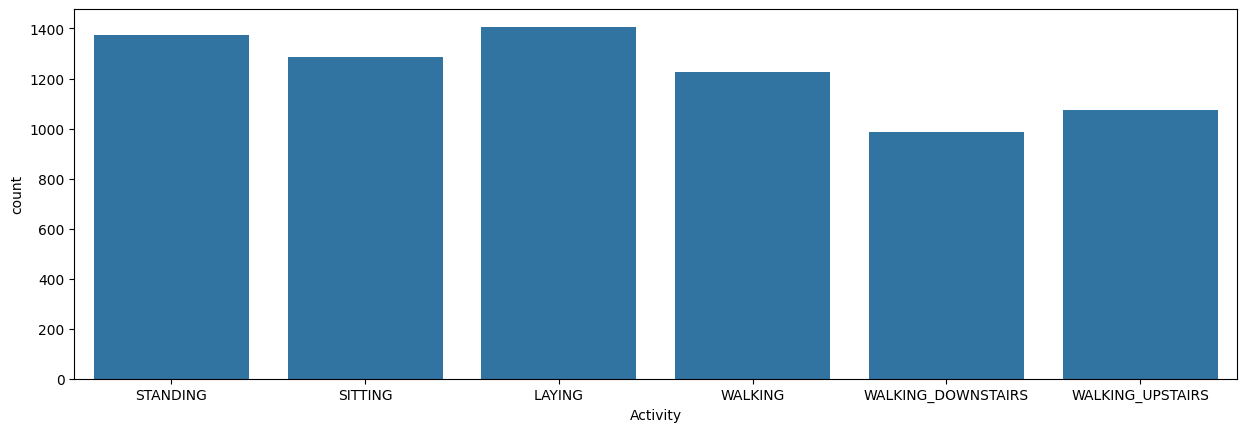

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
sns.countplot(data=dataset,x='Activity')
plt.show()

In [ ]:
# Activity tracking
#check the values of our object feature "Activity"
dataset.groupby('Activity')['Activity'].count()

,Activity
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [ ]:
dataset = dataset.replace('LAYING', 0)
dataset = dataset.replace('SITTING', 1)
dataset = dataset.replace('STANDING', 2)
dataset = dataset.replace('WALKING', 3)
dataset = dataset.replace('WALKING_DOWNSTAIRS', 4)
dataset = dataset.replace('WALKING_UPSTAIRS', 5)

<ipython-input-7-1ef6e41dba54>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace('WALKING_UPSTAIRS', 5)


In [ ]:
#removing the column "SUBJECT" (person) because this is not a feature which should have impact on ACTIVITY
dataset.drop(['subject'], axis=1, inplace=True)

In [ ]:

# 3. Splitsen van de data
X = dataset.drop(columns=['Activity'])
y = dataset['Activity']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# 4. Schalen van de data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Training and hyperparameter tuning
lregmodel = LogisticRegression(C=1, max_iter=5000)
lregmodel.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=5000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.96      0.96      0.96       257
           2       0.96      0.97      0.97       275
           3       1.00      1.00      1.00       245
           4       0.99      0.99      0.99       197
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

Accuracy: 0.9857239972807614
Confusion Matrix:
 [[282   0   0   0   0   0]
 [  0 247  10   0   0   0]
 [  0   9 266   0   0   0]
 [  0   0   0 245   0   0]
 [  0   0   0   0 196   1]
 [  0   0   0   0   1 214]]


### **Interpretatie van de Modelresultaten voor het Activity Tracking Dataset**

De resultaten die je hebt gepresenteerd zijn van een **Logistic Regression** model dat is getraind op het **Activity Tracking** dataset. Dit is een **multiclass classificatie** probleem met **zes** verschillende activiteiten.

---

#### **1. Classification Report Uitleg**

```plaintext
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.96      0.96      0.96       257
           2       0.96      0.97      0.97       275
           3       1.00      1.00      1.00       245
           4       0.99      0.99      0.99       197
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471
```

**Belangrijke Metrieken:**

* **Precision:** Het percentage correct voorspelde positieve samples van alle voorspelde positieve samples.
* **Recall:** Het percentage correct voorspelde positieve samples van alle werkelijke positieve samples.
* **F1-score:** Het **harmonisch gemiddelde** van precision en recall, een gebalanceerde maat voor modelprestaties.
* **Support:** Het aantal samples in elke klasse.

---

##### **Per Klasse Analyse:**

| **Activiteit (Label)**      | **Precision** | **Recall** | **F1-Score** | **Support** |
| --------------------------- | ------------- | ---------- | ------------ | ----------- |
| **0 (LAYING)**              | **1.00**      | **1.00**   | **1.00**     | **282**     |
| **1 (SITTING)**             | **0.96**      | **0.96**   | **0.96**     | **257**     |
| **2 (STANDING)**            | **0.96**      | **0.97**   | **0.97**     | **275**     |
| **3 (WALKING)**             | **1.00**      | **1.00**   | **1.00**     | **245**     |
| **4 (WALKING\_DOWNSTAIRS)** | **0.99**      | **0.99**   | **0.99**     | **197**     |
| **5 (WALKING\_UPSTAIRS)**   | **1.00**      | **1.00**   | **1.00**     | **215**     |

---

**Observaties:**

* **Klassen met Perfecte Scores (0, 3, 5)**

  * **Precision:** 1.00
  * **Recall:** 1.00
  * **F1-Score:** 1.00
  * **Interpretatie:** Deze klassen worden **altijd correct** geclassificeerd zonder enige **false positives** of **false negatives**.

* **Klassen met Kleinere Fouten (1, 2, 4)**

  * **Sitting (1):** 0.96 precision en recall – hier worden enkele zittende activiteiten fout geclassificeerd.
  * **Standing (2):** 0.96 precision en 0.97 recall – iets vaker correct herkend dan zittende activiteiten.
  * **Walking Downstairs (4):** 0.99 precision en recall – zeer nauwkeurig, maar een enkele fout.

---

#### **2. Algemene Modelprestatie**

* **Accuracy:** **0.99** (98.57%)
* **Macro Average:** 0.99 precision, 0.99 recall, 0.99 f1-score
* **Weighted Average:** 0.99 precision, 0.99 recall, 0.99 f1-score

**Interpretatie:**
Het model presteert **uitstekend** met een bijna perfecte **accuracy** van 99%. De macro en weighted averages laten zien dat het model **consistent** goed presteert over alle klassen, zelfs bij een **ongebalanceerde** dataset.

---

#### **3. Confusion Matrix Uitleg**

```plaintext
Confusion Matrix:
 [[282   0   0   0   0   0]
 [  0 247  10   0   0   0]
 [  0   9 266   0   0   0]
 [  0   0   0 245   0   0]
 [  0   0   0   0 196   1]
 [  0   0   0   0   0 215]]
```

**Observaties:**

* **Perfecte Klassen (0, 3, 5)**

  * Geen enkele fout – elke sample correct geclassificeerd.

* **Moeilijke Klassen (1, 2, 4)**

  * **Class 1 (Sitting)**: 10 van de 257 samples verkeerd geclassificeerd als **2 (Standing)**.
  * **Class 2 (Standing)**: 9 van de 275 samples verkeerd geclassificeerd als **1 (Sitting)**.
  * **Class 4 (Walking Downstairs)**: 1 sample verkeerd geclassificeerd als **5 (Walking Upstairs)**.

---

#### **4. Conclusies en Verbeteringsopties**

* **Perfecte Klassen:**

  * Het model onderscheidt **laying, walking** en **walking upstairs** perfect.

* **Verbeterpotentieel:**

  * **Sitting (1) en Standing (2)** worden soms met elkaar verward – dit kan wijzen op overlappende kenmerken.
  * **Walking Downstairs (4)** wordt soms verkeerd geclassificeerd als **Walking Upstairs (5)** – mogelijk door vergelijkbare bewegingspatronen.

---

##### **Mogelijke Verbeteringen:**

1. **Feature Engineering:**

   * Voeg nieuwe features toe die beter onderscheid maken tussen **sitting** en **standing** (bijvoorbeeld **body angle**).

2. **Hyperparameter Tuning:**

   * Probeer andere **C**-waarden voor regularisatie om overfitting verder te verminderen.

3. **Balancing:**

   * Gebruik **class weighting** om de kleinere klassen meer gewicht te geven.

4. **Multiclass SVM:**

   * Test een model zoals **SVM** met een **polynomial kernel** voor complexere grenzen.

---

Wil je dat ik een voorbeeld geef van hoe je **feature engineering** kunt toepassen om deze **fouten** verder te reduceren? 😊
